<h1 style="color:blue">Data Science WiSe 2018/19 - Prof. Dr. M. Tropmann-Frick</h1>
<hr>
<h2 style="text-decoration:underline"><center>Übungsblatt 2</center></h2>

<h3>Import the data</h3>

Check the current working directory. 

In [1]:
import os 
os.getcwd()

'/home/jovyan/Data-Science-B2/Praktikum 2'

Import important libaries and load the CSV file into a pandas data frame.

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

stats = pd.read_csv('data/temp_fuhlsbuettel_akt.txt', sep=';')

Drop unnecessary columns. 

In [3]:
stats = stats.drop('eor', 1)

<h3>Explore the data</h3>

There are many ways to view the data.

In [4]:
# get the first 5 rows 
stats.head()

,STATIONS_ID,MESS_DATUM,QN_9,TT_TU,RF_TU
0,1975,2016032200,3,5.9,89.0
1,1975,2016032201,3,5.5,86.0
2,1975,2016032202,3,5.4,87.0
3,1975,2016032203,3,4.7,90.0
4,1975,2016032204,3,5.1,94.0


In [5]:
# get the last 10 rows 
stats.tail(10)

,STATIONS_ID,MESS_DATUM,QN_9,TT_TU,RF_TU
13190,1975,2017092214,1,17.2,70.0
13191,1975,2017092215,1,16.9,76.0
13192,1975,2017092216,1,16.0,85.0
13193,1975,2017092217,1,15.3,86.0
13194,1975,2017092218,1,14.4,89.0
13195,1975,2017092219,1,14.1,90.0
13196,1975,2017092220,1,14.4,84.0
13197,1975,2017092221,1,13.6,85.0
13198,1975,2017092222,1,13.6,83.0
13199,1975,2017092223,1,13.1,84.0


In [6]:
# get rows between a certain range
stats[42:50]

,STATIONS_ID,MESS_DATUM,QN_9,TT_TU,RF_TU
42,1975,2016032318,3,7.2,73.0
43,1975,2016032319,3,6.2,77.0
44,1975,2016032320,3,5.0,83.0
45,1975,2016032321,3,3.4,88.0
46,1975,2016032322,3,2.0,96.0
47,1975,2016032323,3,0.8,99.0
48,1975,2016032400,3,-0.8,97.0
49,1975,2016032401,3,-1.2,99.0


In [7]:
# get only certain columns 
stats.head()[['MESS_DATUM', 'TT_TU']]

,MESS_DATUM,TT_TU
0,2016032200,5.9
1,2016032201,5.5
2,2016032202,5.4
3,2016032203,4.7
4,2016032204,5.1


Show information of all columns.

In [8]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 5 columns):
STATIONS_ID    13200 non-null int64
MESS_DATUM     13200 non-null int64
QN_9           13200 non-null int64
TT_TU          13200 non-null float64
RF_TU          13200 non-null float64
dtypes: float64(2), int64(3)
memory usage: 515.7 KB


Calculate some basic stats of the columns like mean, median, std, min, max, ...

In [9]:
stats.describe()

,STATIONS_ID,MESS_DATUM,QN_9,TT_TU,RF_TU
count,13200.0,1.320000e+04,13200.000000,13200.000000,13200.000000
mean,1975.0,2.016548e+09,2.890909,11.357614,79.935606
std,0.0,4.856914e+05,0.454199,7.007488,15.526191
min,1975.0,2.016032e+09,1.000000,-10.300000,22.000000
25%,1975.0,2.016081e+09,3.000000,6.200000,69.000000
50%,1975.0,2.016122e+09,3.000000,11.700000,84.000000
75%,1975.0,2.017051e+09,3.000000,16.700000,93.000000
max,1975.0,2.017092e+09,3.000000,31.500000,100.000000


Extract the column TT_TU as Series.

In [10]:
temp = stats.TT_TU
type(temp)

pandas.core.series.Series

Find the start and end time of the column MESS_DATUM.

In [11]:
time_start = min(stats.MESS_DATUM)
time_end = max(stats.MESS_DATUM)
print("Time start: {}".format(time_start))
print("Time end: {}".format(time_end))

Time start: 2016032200
Time end: 2017092223


Format the column MESS_DATUM.

In [12]:
MESS_DATUM_formated = pd.date_range(start=pd.Timestamp('22-03-2016 00:00:00'), end=pd.Timestamp('22-09-2017 23:00:00'), freq='H')
stats.MESS_DATUM = MESS_DATUM_formated

stats.head()

,STATIONS_ID,MESS_DATUM,QN_9,TT_TU,RF_TU
0,1975,2016-03-22 00:00:00,3,5.9,89.0
1,1975,2016-03-22 01:00:00,3,5.5,86.0
2,1975,2016-03-22 02:00:00,3,5.4,87.0
3,1975,2016-03-22 03:00:00,3,4.7,90.0
4,1975,2016-03-22 04:00:00,3,5.1,94.0


<h3>Create some data visualization for temperature</h3> 

Plot time on y-axis and temperature on x-axis.

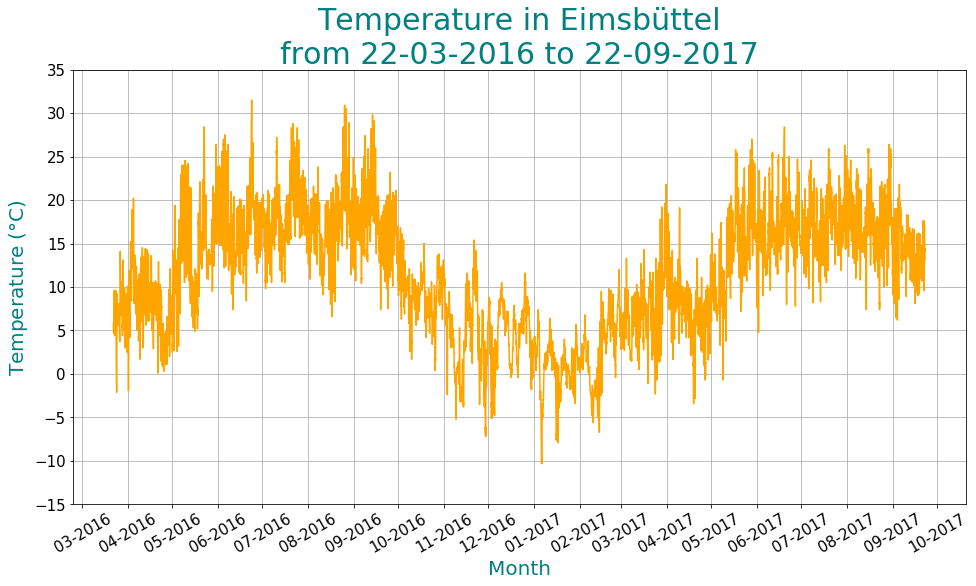

In [13]:
import matplotlib.dates as mdates
monthsYearsFmt = mdates.DateFormatter('%m-%Y')
months = mdates.MonthLocator() # every month 

# set plot size
plt.rcParams["figure.figsize"] = (16, 8)

f, ax = plt.subplots()

# data
x = stats.MESS_DATUM # time series 
y = stats.TT_TU # temperature 

# plot 
ax.plot(x, y, color = 'orange')
ax.grid(True)

# format title
ax.set_title("Temperature in Eimsbüttel\nfrom 22-03-2016 to 22-09-2017", fontsize = 30, color = 'teal')

# format x-axis 
# show month and year 
ax.set_xlabel("Month", fontsize = 20, color = 'teal')
ax.xaxis.set_major_formatter(monthsYearsFmt)
ax.xaxis.set_major_locator(months)
plt.xticks(fontsize = 15, rotation=30)

# format y-axis
ax.set_ylabel("Temperature ($\degree$C)", fontsize = 20, color = 'teal')
plt.yticks(np.arange(-15, 36, 5), fontsize = 15)

plt.show()

Plot temperature of August in 2016 and 2017.

In [14]:
# get temperature of August in 2016 and 2017
stats_august_2016 = stats[(stats.MESS_DATUM.dt.month == 8) & (stats.MESS_DATUM.dt.year == 2016)]
stats_august_2017 = stats[(stats.MESS_DATUM.dt.month == 8) & (stats.MESS_DATUM.dt.year == 2017)]

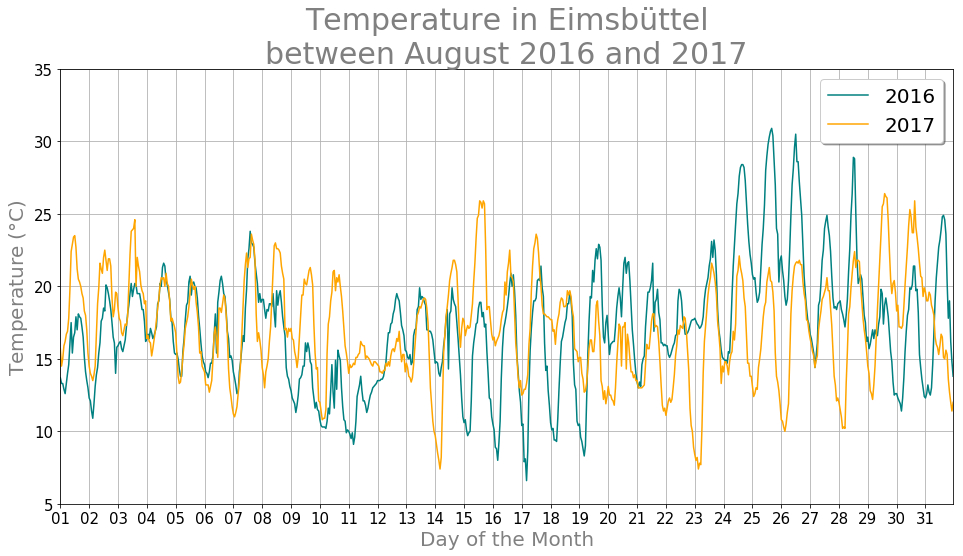

In [15]:
daysFmt = mdates.DateFormatter('%d')
days = mdates.DayLocator() # every day

f, ax = plt.subplots()
ax.grid(True)

# data
x = stats_august_2016.MESS_DATUM # time series of 08.2016
y1 = stats_august_2016.TT_TU # temp in 08.2016
y2 = stats_august_2017.TT_TU # temp in 08.2017

# plot temp in 08.2016 
ax.plot(x, y1, 'teal', label = '2016')
# plot temp in 08.2017 
ax.plot(x, y2, 'orange', label = '2017')

# format title
ax.set_title("Temperature in Eimsbüttel\nbetween August 2016 and 2017", fontsize = 30, color = 'gray')

# format x-axis 
ax.set_xlabel("Day of the Month", fontsize = 20, color = 'gray')
plt.xticks(fontsize = 15)

# show only days of the month  
ax.set_xlim([x.iloc[0], x.iloc[-1]])
ax.xaxis.set_major_formatter(daysFmt)
ax.xaxis.set_major_locator(days)

# format y-axis 
ax.set_ylabel("Temperature ($\degree$C)", fontsize = 20, color = 'gray')
ax.set_ylim(5, 35)
plt.yticks(fontsize = 15)

# format legend 
plt.legend(prop = {'size': 20}, frameon = True, fancybox = True, shadow = True, framealpha = 1)

plt.show()

Plot specific time in June 2017 where temperature is above 25&deg;C

In [16]:
stats_june_2017_temp_greater_than_25 = stats[(stats.MESS_DATUM.dt.month == 6) & (stats.MESS_DATUM.dt.year == 2017) & (stats.TT_TU > 25)]

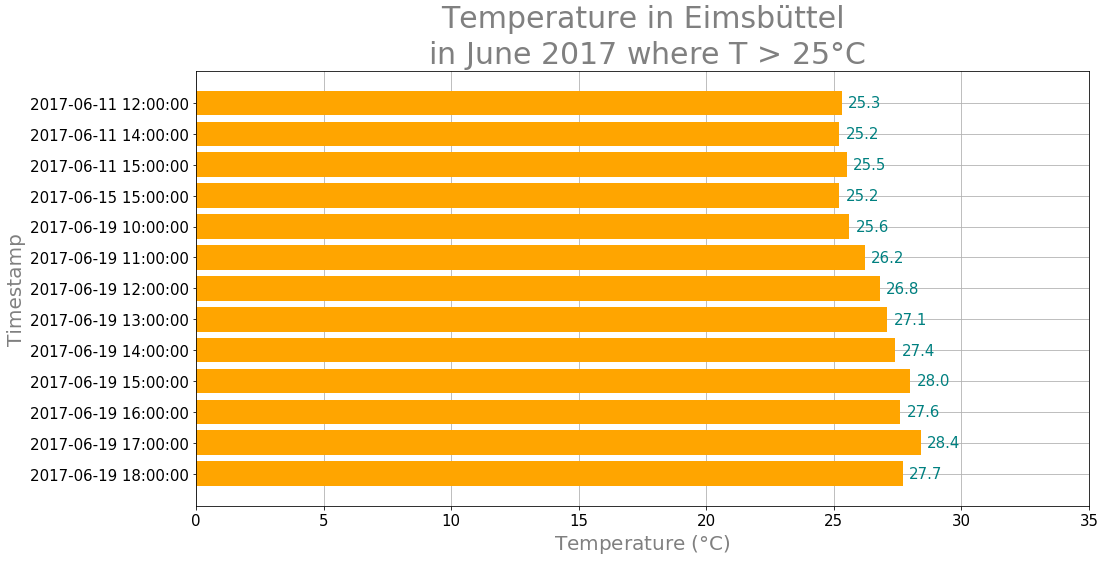

In [17]:
f, ax = plt.subplots()

# data
timestamps = stats_june_2017_temp_greater_than_25.MESS_DATUM
y_pos = np.arange(len(timestamps))
temps = stats_june_2017_temp_greater_than_25.TT_TU

# plot 
ax.barh(y_pos, temps, color='orange')
ax.grid(True)
ax.set_axisbelow(True)

# format title
ax.set_title("Temperature in Eimsbüttel\n in June 2017 where T > 25$\degree$C", fontsize = 30, color = 'gray')

# format x-axis
ax.set_xlabel("Temperature ($\degree$C)", fontsize = 20, color = 'gray')
ax.set_xlim(0, 35)
plt.xticks(fontsize = 15)

# format y-axis
ax.set_ylabel("Timestamp", fontsize = 20, color = 'gray')
ax.set_yticks(y_pos)
ax.set_yticklabels(timestamps)
ax.invert_yaxis()
plt.yticks(fontsize = 15)

# add value next to bar
for i, v in enumerate(temps):
    ax.text(v + 0.25, i, v, color='teal', fontsize = 15, verticalalignment='center')

plt.show()